# 1. Importing Libraries & Loading Airline Data

In [1]:
"""
This section imports the required libraries, loads the dataset, and performs an initial inspection.
"""

# import libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

df = pd.read_csv('data.csv')
df.head() 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 2. Data Cleaning & Basic Inspection

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [3]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 103904, Columns: 25


In [4]:
df = df.iloc[:, 1:]
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
"""
This section performs data cleaning by identifying missing values, calculating their percentages,
and replacing the null values in 'Arrival Delay in Minutes' using the median. 
It also standardizes the satisfaction labels and creates a numeric satisfaction variable.
Finally, the code verifies that all missing values have been successfully handled.
"""

"\nThis section performs data cleaning by identifying missing values, calculating their percentages,\nand replacing the null values in 'Arrival Delay in Minutes' using the median. \nIt also standardizes the satisfaction labels and creates a numeric satisfaction variable.\nFinally, the code verifies that all missing values have been successfully handled.\n"

In [6]:
# Missing values

print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100) # Null values percentage of the total column values

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64
id 

In [7]:
# Fill all null values using the median
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [8]:
# Fix satisfaction labels
df['satisfaction'] = df['satisfaction'].replace({
    'neutral or dissatisfied': 'dissatisfied'
})

In [9]:
# Encode satisfaction
df['satisfaction_num'] = df['satisfaction'].map({
    'dissatisfied': 0,
    'satisfied': 1
})

In [10]:
# Double check if null values were handled
print("\nNulls after cleaning:")
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)


Nulls after cleaning:
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
satisfaction_num                     0
dt

In [11]:
"""
This section checks the dataset for duplicate rows, identifies categorical and numerical columns,
and generates descriptive summaries for each group.
"""

'\nThis section checks the dataset for duplicate rows, identifies categorical and numerical columns,\nand generates descriptive summaries for each group.\n'

In [12]:
# Check duplicates
print('Data Duplicates')
print(f"Duplicates: {df.duplicated().sum()}") #no duplicates based on the result

Data Duplicates
Duplicates: 0


In [13]:
# Identify types
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [14]:
print("\nCategorical Columns:", list(cat_cols))
print("\nNumeric Columns:", list(num_cols))


Categorical Columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

Numeric Columns: ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_num']


In [15]:
# Describe categorical columns
df[cat_cols].describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,dissatisfied
freq,52727,84923,71655,49665,58879


In [16]:
# Describe numerical columns
df[num_cols].describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_num
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,0.433333
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,0.495538
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


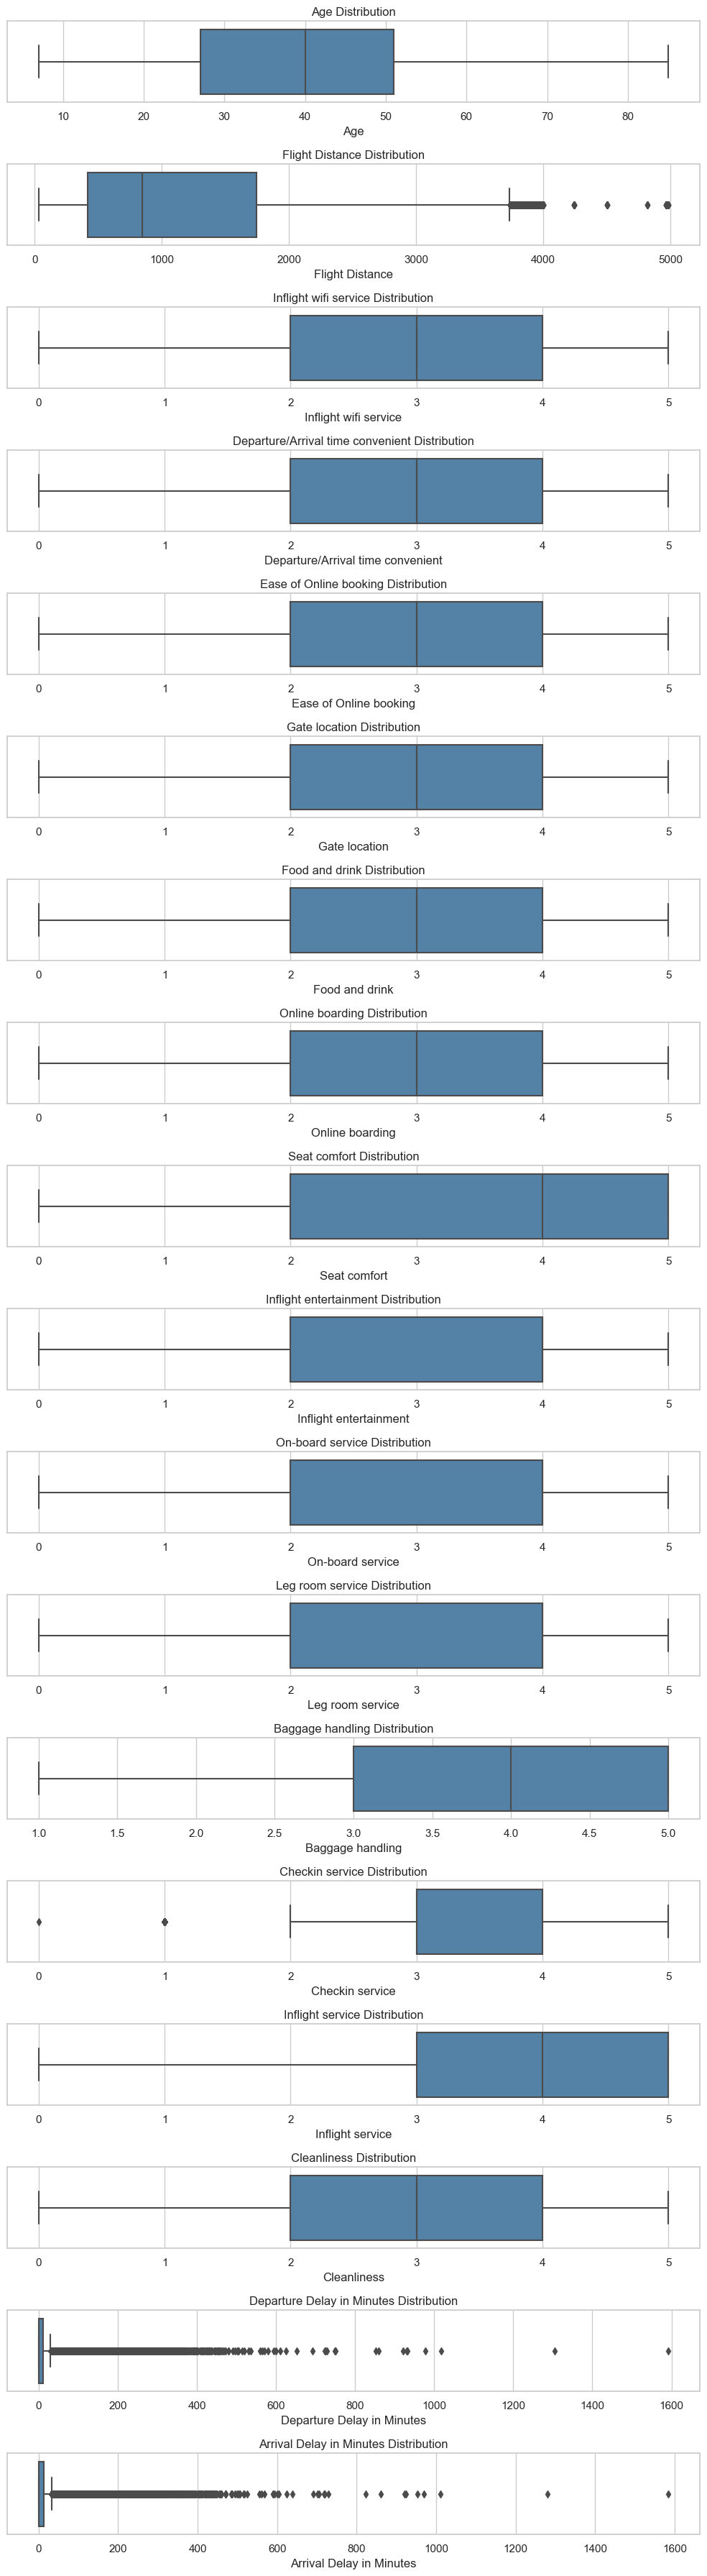

In [17]:
"""
This section performs outlier analysis by generating boxplots for all numerical features.
The visualizations help identify extreme values 
and understand the distribution of each numeric column before modeling and further analysis.
"""

# Outlier Analysis
# Exclude columns that should not be in outlier checking
exclude_cols = ['id', 'satisfaction_num', 'satisfaction']

numeric_columns = [col for col in num_cols if col not in exclude_cols]

# Boxplots for all numeric columns
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, len(numeric_columns) * 2))

for i, col in enumerate(numeric_columns):
    if len(numeric_columns) == 1:
        ax = axes
    else:
        ax = axes[i]
    
    sns.boxplot(x=df[col], ax=ax, color='steelblue')
    ax.set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()


# 3. Feature Engineering

## 3.1. Delay Category

In [18]:
"""
This section engineers new categorical features by creating Total Delay and grouping delay, age, 
and flight distance into meaningful categories. 
It also converts the Class variable into an ordered categorical type.
"""

'\nThis section engineers new categorical features by creating Total Delay and grouping delay, age, \nand flight distance into meaningful categories. \nIt also converts the Class variable into an ordered categorical type.\n'

In [19]:
# Total Delay
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

# Delay Category based on total delay
df['Delay Category'] = pd.cut(
    df['Total Delay'],
    bins=[-1, 0, 30, 60, 120, 10000],
    labels=[
        'No delay',
        'Short delay (<30 min)',
        'Medium delay (30-59 min)',
        'Long delay (1-2 hours)',
        'Very long delay (>2 hours)'
    ]
)

## 3.2. Age Category

In [20]:
df['Age Group'] = pd.cut(
    df['Age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['0-18', '19-30', '31-45', '46-59', '60+']
)

## 3.3 Distance Category

In [21]:
df['Distance Category'] = pd.cut(
    df['Flight Distance'],
    bins=[0, 500, 1500, 3000, 10000],
    labels=[
        'Short (<500 km)',
        'Medium (500-1500 km)',
        'Long (1501-3000 km)',
        'Very long (>3000 km)'
    ]
)

## 3.4. Proper Class Order

In [22]:
df['Class'] = pd.Categorical(
    df['Class'],
    categories=['Eco', 'Eco Plus', 'Business'],
    ordered=True
)

# 4. Data Analysis

In [23]:
#Color pallette
satisfaction_palette = ['#EF5350', '#66BB6A']  # dissatisfied, satisfied
category_palette = ["#4C72B0", "#DD8452", "#8172B2", "#937860", "#64B5CD"]  # no red/green
neutral_color = "#4682B4"  # for distribution plots

# Helper function for formatting counts as thousands
def format_thousands(x: float) -> str:
    """Format count as thousands (e.g., 22534 -> '22.5')."""
    return f"{x / 1000:.1f}"

# 4.1.a. Numerical Distribution

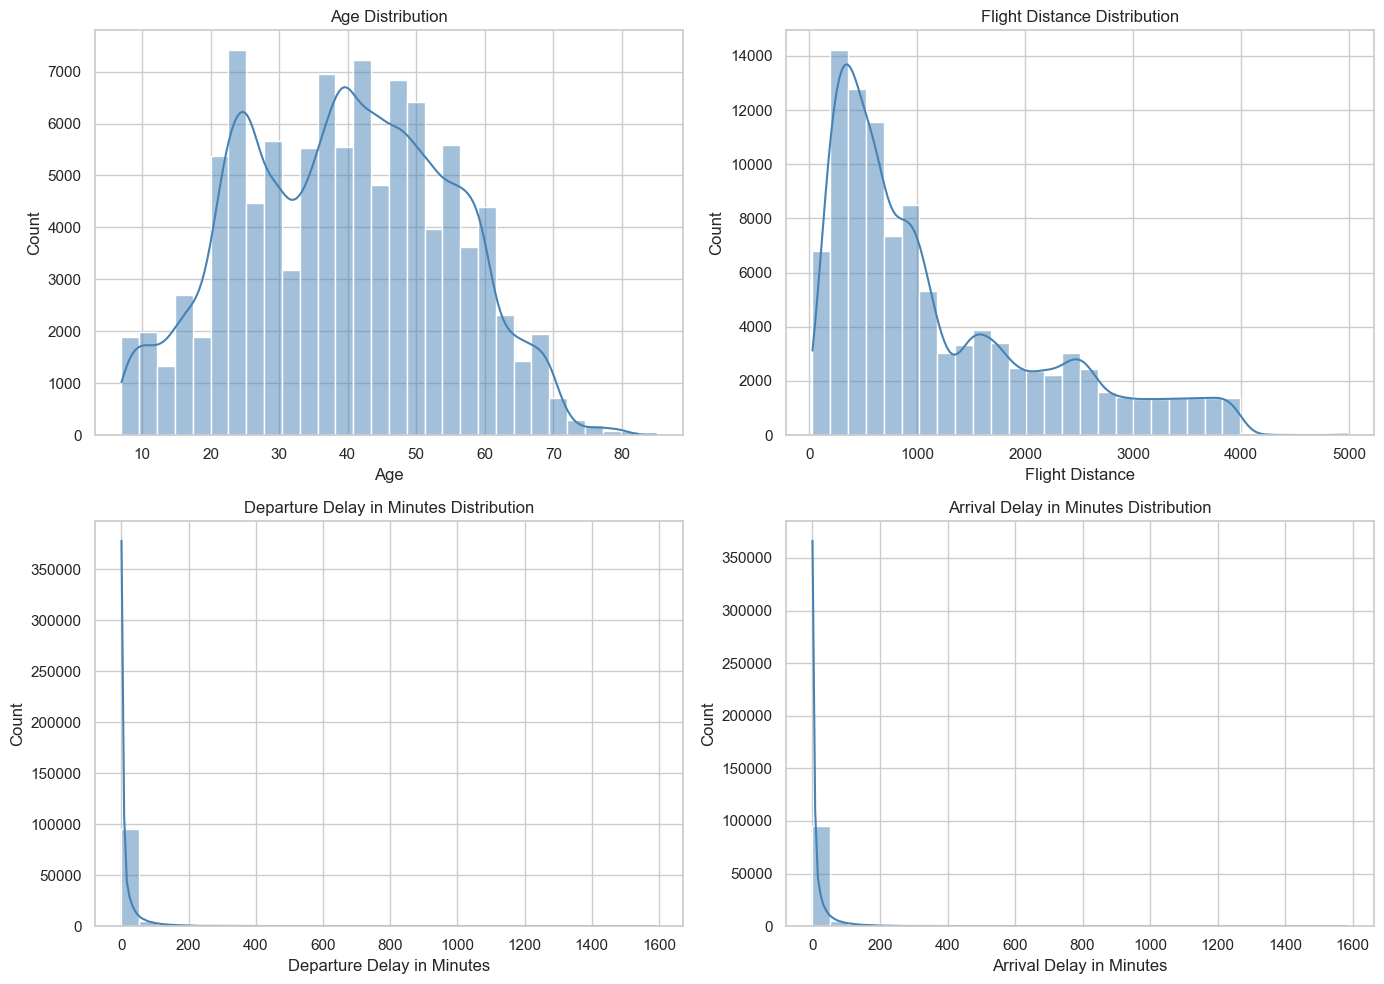

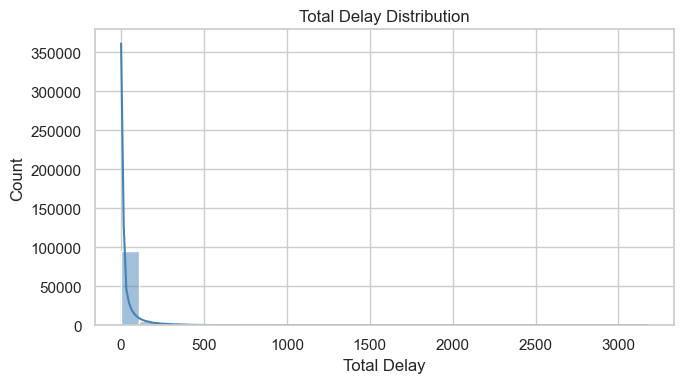

In [24]:
"""
This section visualizes the distribution of key numerical features using histograms with KDE curves. 
These plots help identify the shape, spread, and potential skewness of variables such as age, flight 
distance, and delay times, providing a clearer understanding of their underlying patterns before further analysis.
"""

numeric_to_plot = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Total Delay'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot histogram
for i, col in enumerate(numeric_to_plot[:4]):
    sns.histplot(df[col], kde=True, bins=30, color=neutral_color, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.histplot(df[numeric_to_plot[4]], kde=True, bins=30, color=neutral_color)
plt.title(f"{numeric_to_plot[4]} Distribution")
plt.xlabel(numeric_to_plot[4])
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# 4.1.b. Numerical Distribution - Zoom In

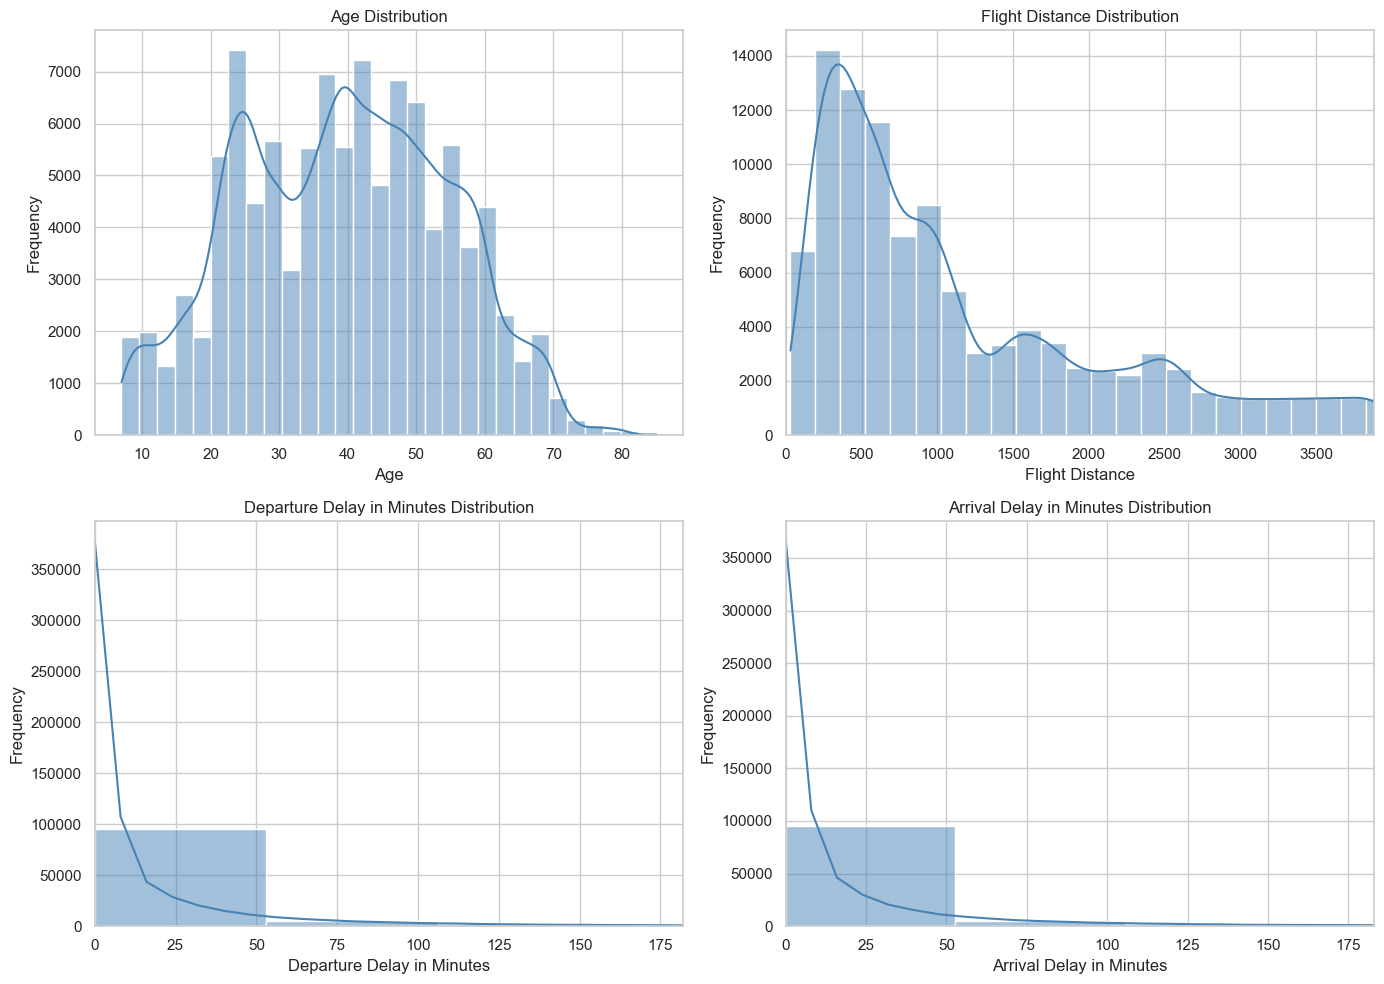

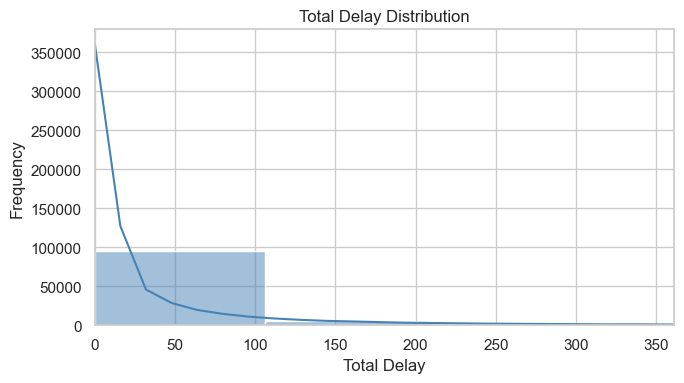

In [25]:
"""
This section plots histograms for key numerical variables and applies a 99th-percentile cap to 
highly skewed features (such as delay times) to reduce the influence of extreme outliers.
"""

numeric_to_plot = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Total Delay'
]

# Plot histogram
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_to_plot[:4]):
    ax = axes[i]
    
    sns.histplot(df[col], kde=True, bins=30, color=neutral_color, ax=ax)

    # Cap extremely skewed variables at 99th percentile
    if "Delay" in col or col == "Flight Distance":
        upper_lim = df[col].quantile(0.99)
        ax.set_xlim(0, upper_lim)

    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
col = numeric_to_plot[4]

sns.histplot(df[col], kde=True, bins=30, color=neutral_color)

# Cap extremely skewed variables at 99th percentile
if "Delay" in col:
    upper_lim = df[col].quantile(0.99)
    plt.xlim(0, upper_lim)

plt.title(f"{col} Distribution")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## 4.2. Target Variable - Satisfaction Distribution

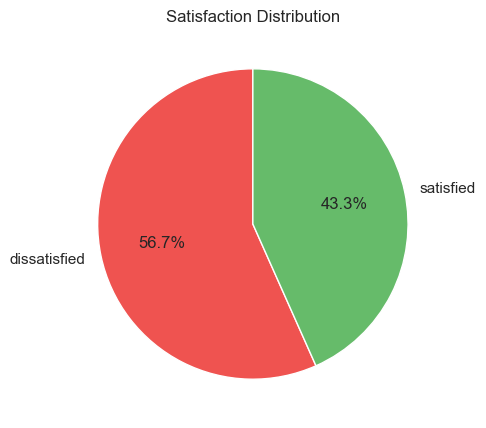

In [26]:
plt.figure(figsize=(5, 5))
df['satisfaction'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=satisfaction_palette
)

plt.title("Satisfaction Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

## 4.3 Customer Demographics

### 4.3.1. Satisfaction by Demographic Group

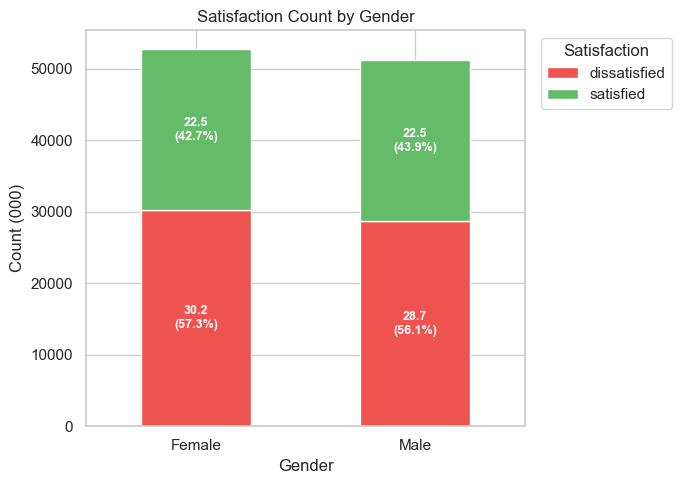

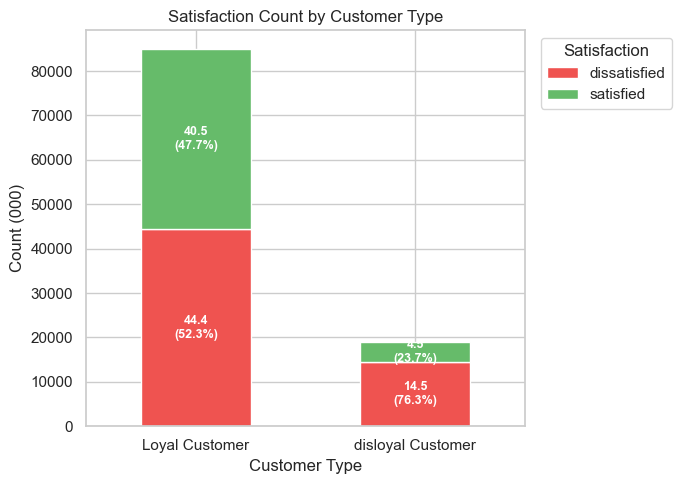

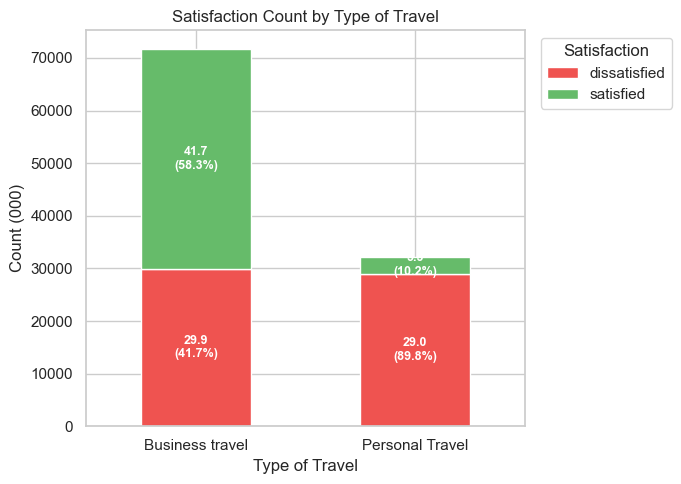

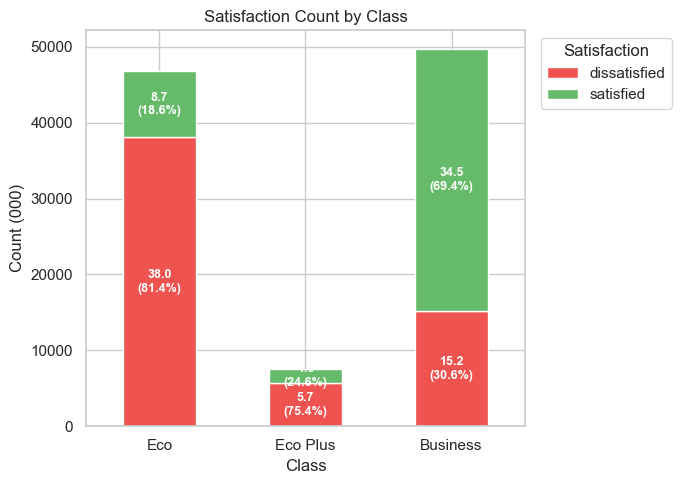

In [27]:
"""
This section creates stacked bar charts to visualize satisfaction levels across key profile variables. 
These plots help identify how satisfaction differs across customer segments.
"""

profile_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for var in profile_vars:

    ct = pd.crosstab(df[var], df['satisfaction'])[['dissatisfied', 'satisfied']]
    pct = ct.div(ct.sum(axis=1), axis=0) * 100  
    ax = ct.plot(
        kind='bar',
        stacked=True,
        figsize=(7, 5),
        color=satisfaction_palette
    )

    plt.title(f"Satisfaction Count by {var}")
    plt.ylabel("Count (000)")
    plt.xlabel(var)
    plt.xticks(rotation=0)
    plt.legend(title="Satisfaction", bbox_to_anchor=(1.02, 1), loc="upper left")

    
    for i in range(len(ct.index)):
        bottom = 0
        for col in ct.columns:
            val = ct.iloc[i][col]
            percent = pct.iloc[i][col]

            ax.text(
                i,
                bottom + val / 2,
                f"{format_thousands(val)}\n({percent:.1f}%)",
                ha='center',
                va='center',
                color='white',
                fontsize=9,
                fontweight='bold'
            )
            bottom += val

    plt.tight_layout()
    plt.show()

### 4.3.2.a Customer Type Distribution Across Classes

<Figure size 1000x600 with 0 Axes>

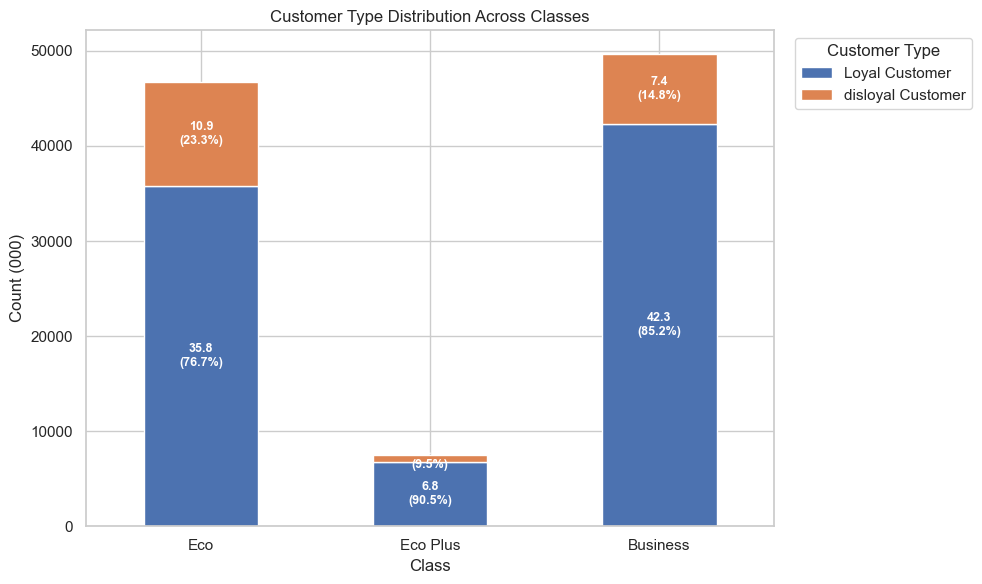

In [28]:
"""
This section visualizes how Customer Type (loyal vs. disloyal) is distributed across travel 
classes using a stacked bar chart. It calculates row-wise percentages and annotates each bar 
with counts and percentage values. This helps identify how loyalty differs between classes 
and highlights the composition of customer segments within each class.
"""

ct_class = pd.crosstab(df['Class'], df['Customer Type'])
ct_class = ct_class[['Loyal Customer','disloyal Customer']]

# Percentages per row
pct_class = ct_class.div(ct_class.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
ax = ct_class.plot(
    kind='bar',
    stacked=True,
    color=category_palette[:2],
    figsize=(10, 6)
)

plt.title("Customer Type Distribution Across Classes")
plt.xlabel("Class")
plt.ylabel("Count (000)")
plt.xticks(rotation=0)
plt.legend(title="Customer Type", bbox_to_anchor=(1.02, 1), loc="upper left")

# Add labels
for i, cls in enumerate(ct_class.index):
    bottom = 0
    for col in ct_class.columns:
        count_val = ct_class.loc[cls, col]
        pct_val = pct_class.loc[cls, col]

        ax.text(
            i,
            bottom + count_val / 2,
            f"{format_thousands(count_val)}\n({pct_val:.1f}%)",
            ha='center',
            va='center',
            color="white",
            fontsize=9,
            fontweight='bold'
        )

        bottom += count_val

plt.tight_layout()
plt.show()

### 4.3.2.b Heatmap - Average Satisfaction by Customer Type and Class

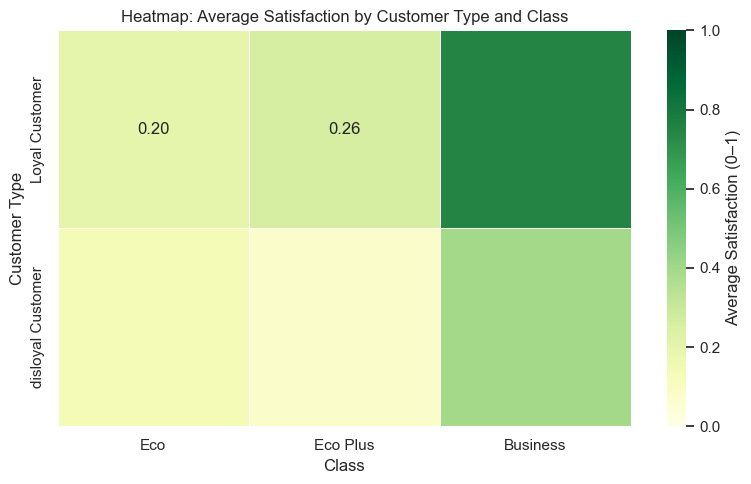

In [29]:
plt.figure(figsize=(8, 5))

cust_class_heatmap = df.pivot_table(
    values='satisfaction_num',
    index='Customer Type',
    columns='Class',
    aggfunc='mean'
)

sns.heatmap(
    cust_class_heatmap,
    annot=True,
    fmt=".2f",
    cmap="YlGn",
    linewidths=0.5,
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'Average Satisfaction (0–1)'}
)

plt.title("Heatmap: Average Satisfaction by Customer Type and Class")
plt.xlabel("Class")
plt.ylabel("Customer Type")
plt.tight_layout()
plt.show()

### 4.3.3.a Travel Purpose Distribution Across Classes

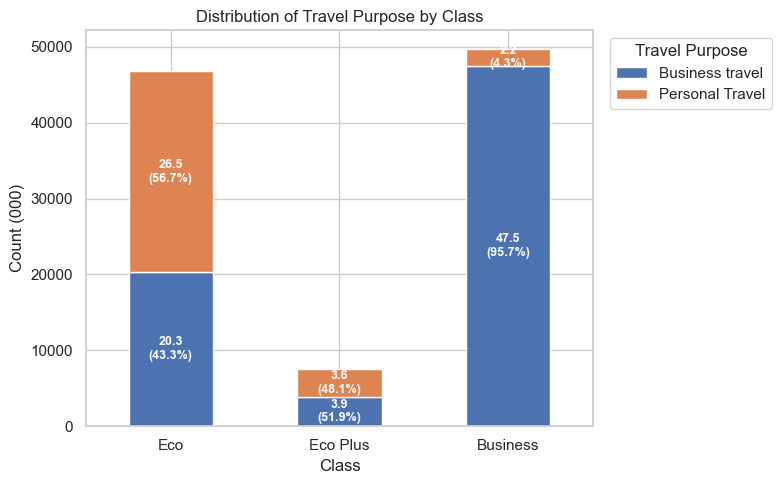

In [30]:
"""
This section visualizes how travel purpose (business vs personal) varies across travel classes 
using a stacked bar chart with counts and percentages. 
It highlights the distribution of each travel type within every class.
"""

travel_class_ct = pd.crosstab(df['Class'], df['Type of Travel'])

pct_travel = travel_class_ct.div(travel_class_ct.sum(axis=1), axis=0) * 100

ax = travel_class_ct.plot(
    kind='bar',
    stacked=True,
    color=category_palette[:2],
    figsize=(8, 5)
)

plt.title("Distribution of Travel Purpose by Class")
plt.xlabel("Class")
plt.ylabel("Count (000)")
plt.xticks(rotation=0)
plt.legend(title="Travel Purpose", bbox_to_anchor=(1.02, 1), loc="upper left")

for i, cls in enumerate(travel_class_ct.index):
    bottom = 0
    for travel_type in travel_class_ct.columns:
        count_val = travel_class_ct.loc[cls, travel_type]
        pct_val = pct_travel.loc[cls, travel_type]

        ax.text(
            i,
            bottom + count_val / 2,
            f"{format_thousands(count_val)}\n({pct_val:.1f}%)",
            ha='center',
            va='center',
            color="white",
            fontsize=9,
            fontweight='bold'
        )
        bottom += count_val

plt.tight_layout()
plt.show()

#### 4.3.3.b Heatmap — Average Satisfaction by Travel Purpose and Class

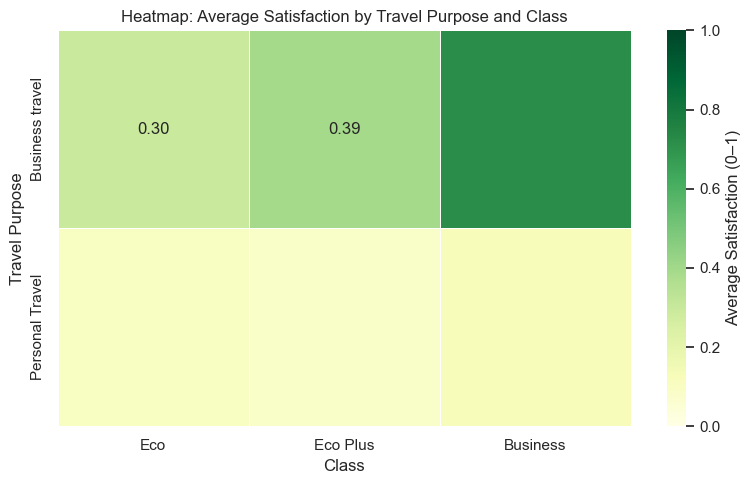

In [31]:
plt.figure(figsize=(8, 5))

travel_class_heatmap = df.pivot_table(
    values='satisfaction_num',
    index='Type of Travel',
    columns='Class',
    aggfunc='mean'
)

sns.heatmap(
    travel_class_heatmap,
    annot=True,
    fmt=".2f",
    cmap="YlGn",
    linewidths=0.5,
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'Average Satisfaction (0–1)'}
)

plt.title("Heatmap: Average Satisfaction by Travel Purpose and Class")
plt.xlabel("Class")
plt.ylabel("Travel Purpose")
plt.tight_layout()
plt.show()

## 4.4. Age-Based Pattern

### 4.4.1 Satisfaction by Age Group

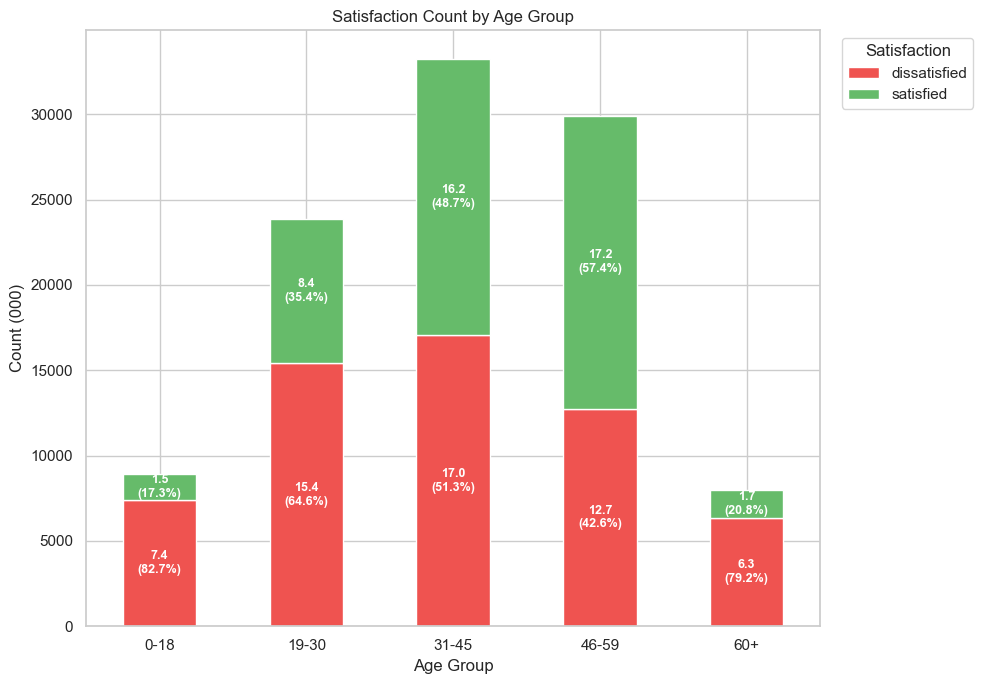

In [32]:
"""
This section plots satisfaction levels across age groups using a stacked bar chart with counts 
and percentages, helping compare how satisfaction varies by age segment.
"""

age_ct = pd.crosstab(df['Age Group'], df['satisfaction'])
age_ct = age_ct[['dissatisfied', 'satisfied']]

pct_age = age_ct.div(age_ct.sum(axis=1), axis=0) * 100

ax = age_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7),
    color=satisfaction_palette
)

plt.title("Satisfaction Count by Age Group")
plt.ylabel("Count (000)")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.legend(title="Satisfaction", bbox_to_anchor=(1.02, 1), loc="upper left")

for i, grp in enumerate(age_ct.index):
    bottom = 0
    for col in age_ct.columns:
        val = age_ct.loc[grp, col]
        percent = pct_age.loc[grp, col]

        ax.text(
            i,
            bottom + val / 2,
            f"{format_thousands(val)}\n({percent:.1f}%)",
            ha='center',
            va='center',
            color='white',
            fontsize=9,
            fontweight='bold'
        )
        bottom += val

plt.tight_layout()
plt.show()


### 4.4.2.a Average Satisfaction by Age Group and Class

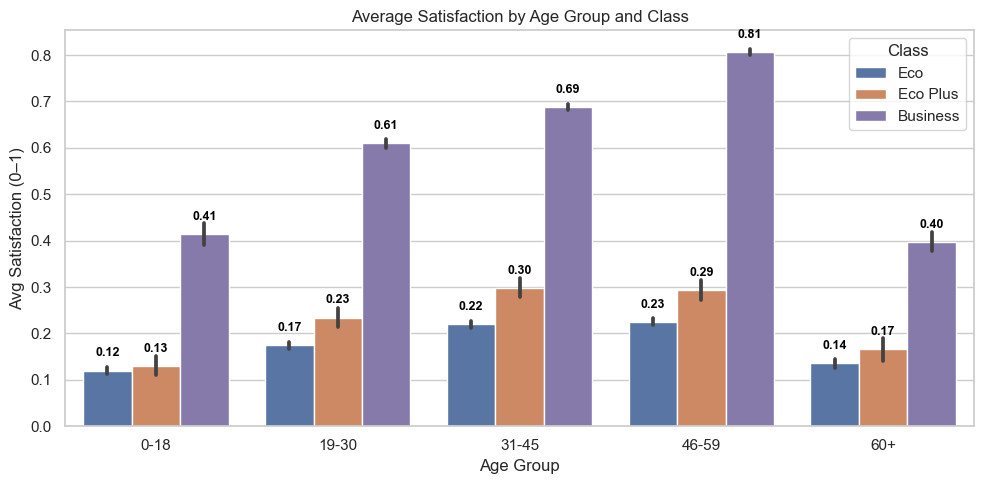

In [33]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=df,
    x='Age Group',
    y='satisfaction_num',
    hue='Class',
    palette=category_palette
)

plt.title("Average Satisfaction by Age Group and Class")
plt.ylabel("Avg Satisfaction (0–1)")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.legend(title="Class")

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f',
        padding=8,
        fontsize=9,
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
plt.show()

### 4.4.2.b Heatmap — Average Satisfaction by Age Group and Class

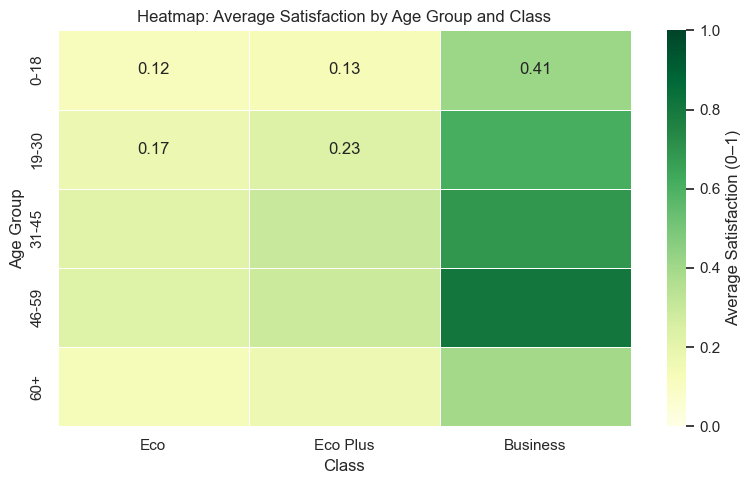

In [34]:
plt.figure(figsize=(8, 5))

age_class_heatmap = df.pivot_table(
    values='satisfaction_num',
    index='Age Group',
    columns='Class',
    aggfunc='mean'
)

sns.heatmap(
    age_class_heatmap,
    annot=True,
    fmt=".2f",
    cmap="YlGn",
    linewidths=0.5,
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'Average Satisfaction (0–1)'}
)

plt.title("Heatmap: Average Satisfaction by Age Group and Class")
plt.xlabel("Class")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

## 4.5. Operational Factors - Delays and Distance

### 4.5.1 Delay Distribution

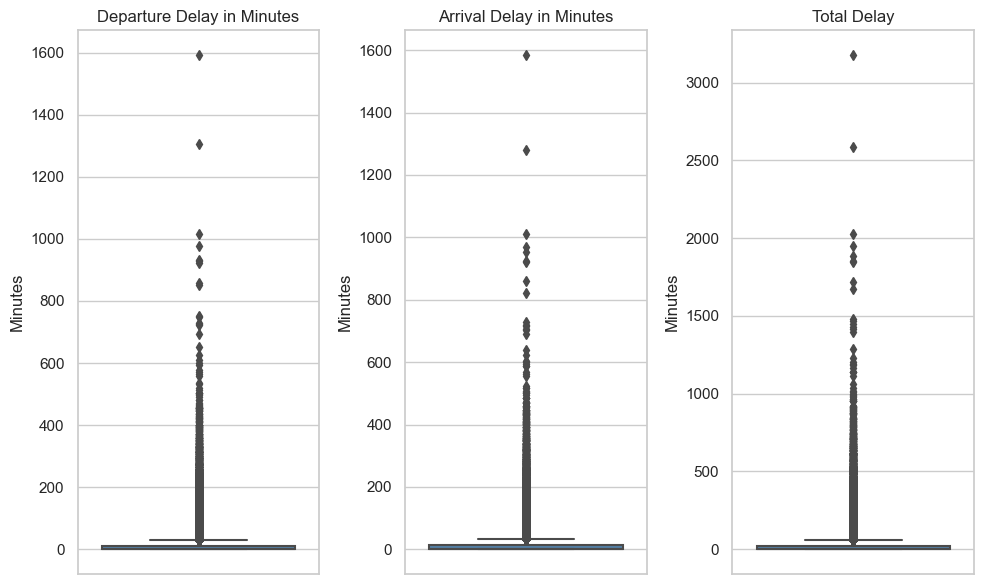

In [35]:
delay_cols = [
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Total Delay'
]

plt.figure(figsize=(10, 6))

for i, col in enumerate(delay_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=neutral_color)
    plt.title(col)
    plt.ylabel("Minutes")

plt.tight_layout()
plt.show()

### 4.5.2. Satisfaction by Delay Category

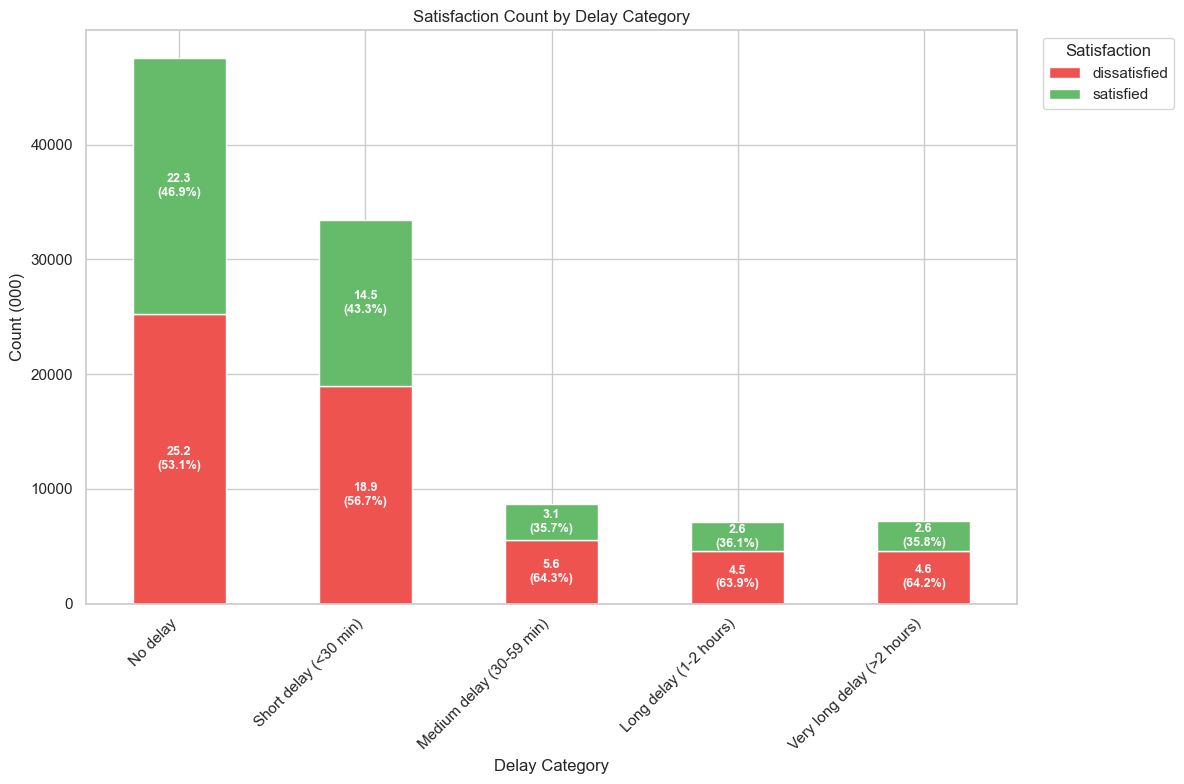

In [36]:
"""
This section visualizes satisfaction levels across delay categories using a stacked bar chart 
with counts and percentages, showing how delays impact customer satisfaction.
"""

delay_ct = pd.crosstab(df['Delay Category'], df['satisfaction'])
delay_ct = delay_ct[['dissatisfied', 'satisfied']]
pct_delay = delay_ct.div(delay_ct.sum(axis=1), axis=0) * 100

ax = delay_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=satisfaction_palette
)

plt.title("Satisfaction Count by Delay Category")
plt.xlabel("Delay Category")
plt.ylabel("Count (000)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Satisfaction", bbox_to_anchor=(1.02, 1), loc="upper left")

for i, cat in enumerate(delay_ct.index):
    bottom = 0
    for col in delay_ct.columns:
        val = delay_ct.loc[cat, col]
        percent = pct_delay.loc[cat, col]

        ax.text(
            i,
            bottom + val / 2,
            f"{format_thousands(val)}\n({percent:.1f}%)",
            ha='center',
            va='center',
            color='white',
            fontsize=9,
            fontweight='bold'
        )
        bottom += val

plt.tight_layout()
plt.show()

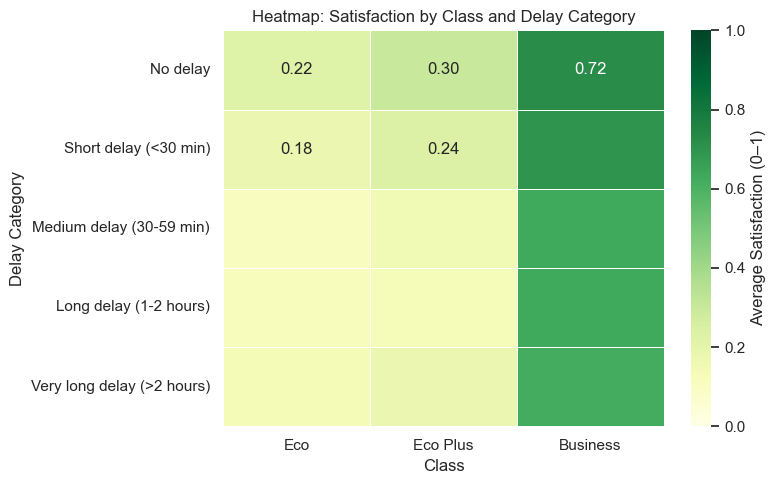

In [37]:
plt.figure(figsize=(8, 5))

# Average satisfaction by Class and Delay Category
class_delay_heatmap = df.pivot_table(
    values='satisfaction_num',
    index='Delay Category',     # rows
    columns='Class',            # columns
    aggfunc='mean'
)

sns.heatmap(
    class_delay_heatmap,
    annot=True,
    fmt=".2f",
    cmap="YlGn",
    linewidths=0.5,
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'Average Satisfaction (0–1)'}
)

plt.title("Heatmap: Satisfaction by Class and Delay Category")
plt.xlabel("Class")
plt.ylabel("Delay Category")
plt.tight_layout()
plt.show()


### 4.5.3.a Satisfaction by Distance Category

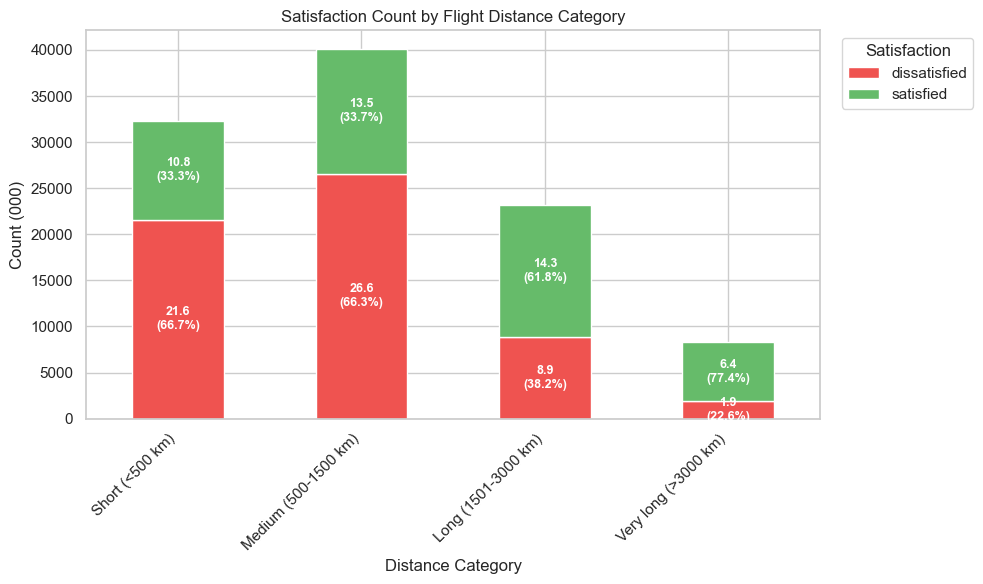

In [38]:
"""
This section visualizes satisfaction levels across flight distance categories using a stacked 
bar chart with counts and percentages, showing how satisfaction varies with trip length.
"""

dist_ct = pd.crosstab(df['Distance Category'], df['satisfaction'])
dist_ct = dist_ct[['dissatisfied', 'satisfied']]
pct_dist = dist_ct.div(dist_ct.sum(axis=1), axis=0) * 100

ax = dist_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=satisfaction_palette
)

plt.title("Satisfaction Count by Flight Distance Category")
plt.xlabel("Distance Category")
plt.ylabel("Count (000)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Satisfaction", bbox_to_anchor=(1.02, 1), loc="upper left")

for i, cat in enumerate(dist_ct.index):
    bottom = 0
    for col in dist_ct.columns:
        val = dist_ct.loc[cat, col]
        percent = pct_dist.loc[cat, col]

        ax.text(
            i,
            bottom + val / 2,
            f"{format_thousands(val)}\n({percent:.1f}%)",
            ha='center',
            va='center',
            color='white',
            fontsize=9,
            fontweight='bold'
        )
        bottom += val

plt.tight_layout()
plt.show()

### 4.5.3.b Heatmap — Average Satisfaction by Distance Category and Class

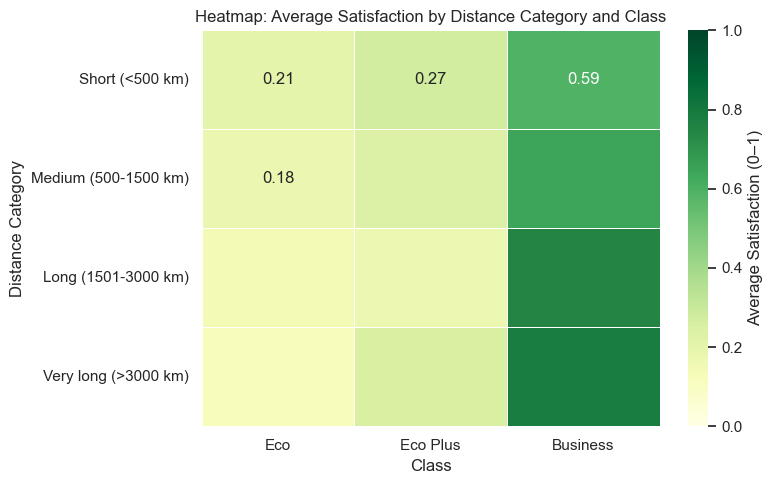

In [39]:
plt.figure(figsize=(8, 5))

dist_class_heatmap = df.pivot_table(
    values='satisfaction_num',
    index='Distance Category',
    columns='Class',
    aggfunc='mean'
)

sns.heatmap(
    dist_class_heatmap,
    annot=True,
    fmt=".2f",
    cmap="YlGn",
    linewidths=0.5,
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'Average Satisfaction (0–1)'}
)

plt.title("Heatmap: Average Satisfaction by Distance Category and Class")
plt.xlabel("Class")
plt.ylabel("Distance Category")
plt.tight_layout()
plt.show()


# Feature Importance Review

## SATISFACTION

### What is the service area that affects satisfaction the most/least?

In [40]:
service_cols = [
    col for col in df.columns
    if col.lower() in [
        'inflight wifi service',
        'departure/arrival time convenient',
        'ease of online booking',
        'gate location',
        'food and drink',
        'online boarding',
        'seat comfort',
        'inflight entertainment',
        'on-board service',
        'leg room service',
        'baggage handling',
        'checkin service',
        'inflight service',
        'cleanliness'
    ]
]
service_cols


['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

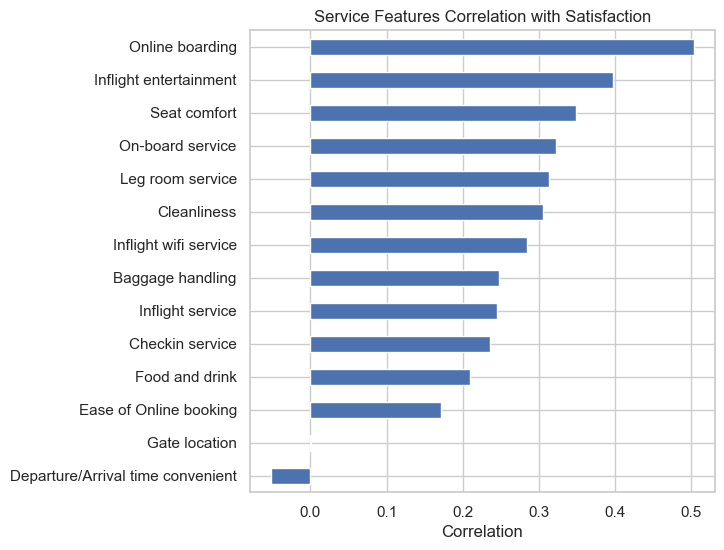

In [41]:
"""
This section computes the correlation between each service feature and customer satisfaction 
and visualizes the results in a sorted bar chart, highlighting which service elements are most 
strongly associated with satisfaction.
"""

corr_service = (
    df[service_cols + ['satisfaction_num']]
    .corr()['satisfaction_num']
    .drop('satisfaction_num')
    .sort_values()
)

plt.figure(figsize=(6,6))
corr_service.plot(kind='barh')
plt.title("Service Features Correlation with Satisfaction")
plt.xlabel("Correlation")
plt.show()


In [42]:
# Service feature list
service_cols = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

# Mean for each service
service_means = df[service_cols].mean()

overall_mean = service_means.mean()

print(f"Overall Mean for Service Features: {overall_mean:.2f}")


Overall Mean for Service Features: 3.24


### What is the Customer features that affects satisfaction the most/least?

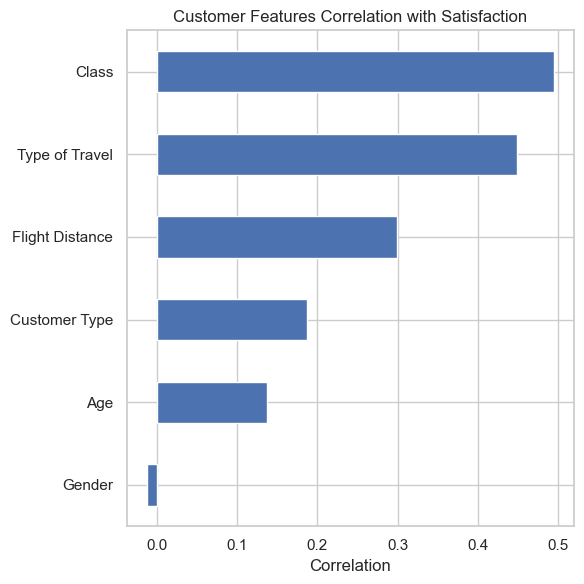

Gender            -0.012211
Age                0.137167
Customer Type      0.187638
Flight Distance    0.298780
Type of Travel     0.449000
Class              0.494471
Name: satisfaction_num, dtype: float64

In [43]:
"""
This section converts key customer attributes into numeric form and computes their correlations 
with satisfaction. 
It then visualizes these relationships in a bar chart to show which customer features are most strongly associated with satisfaction.
"""

import pandas as pd
import matplotlib.pyplot as plt

df1 = df.copy()

df1['satisfaction_num'] = (df1['satisfaction'] == 'satisfied').astype(int)

df1['Gender'] = df1['Gender'].map({'Male': 0, 'Female': 1})

df1['Customer Type'] = df1['Customer Type'].map({
    'disloyal Customer': 0,
    'Loyal Customer': 1
})

df1['Type of Travel'] = df1['Type of Travel'].map({
    'Personal Travel': 0,
    'Business travel': 1
})

df1['Class'] = df1['Class'].map({
    'Eco': 0,
    'Eco Plus': 1,
    'Business': 2
})

# Customer feature list
customer_features = [
    'Gender',
    'Customer Type',
    'Age',
    'Type of Travel',
    'Class',
    'Flight Distance'
]

# Finding correlation
corr_customer = (
    df1[customer_features + ['satisfaction_num']]
    .corr()['satisfaction_num']
    .drop('satisfaction_num')
    .sort_values()
)

# Graph
plt.figure(figsize=(6,6))
corr_customer.plot(kind='barh')
plt.title("Customer Features Correlation with Satisfaction")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()

corr_customer


### What is ALL features that affects satisfaction the most/least?

In [44]:
df2 = df.copy()

# Encode satisfaction
df2['satisfaction_num'] = (df2['satisfaction'] == 'satisfied').astype(int)

# Ordinal encoding
df2['Gender'] = df2['Gender'].map({'Male':0, 'Female':1})

df2['Customer Type'] = df2['Customer Type'].map({
    'disloyal Customer': 0,
    'Loyal Customer': 1
})

df2['Type of Travel'] = df2['Type of Travel'].map({
    'Personal Travel': 0,
    'Business travel': 1
})

df2['Class'] = df2['Class'].map({
    'Eco': 0,
    'Eco Plus': 1,
    'Business': 2
})


In [45]:
service_cols = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]


In [46]:
customer_cols = [
    'Gender',
    'Customer Type',
    'Age',
    'Type of Travel',
    'Class',
    'Flight Distance'
]


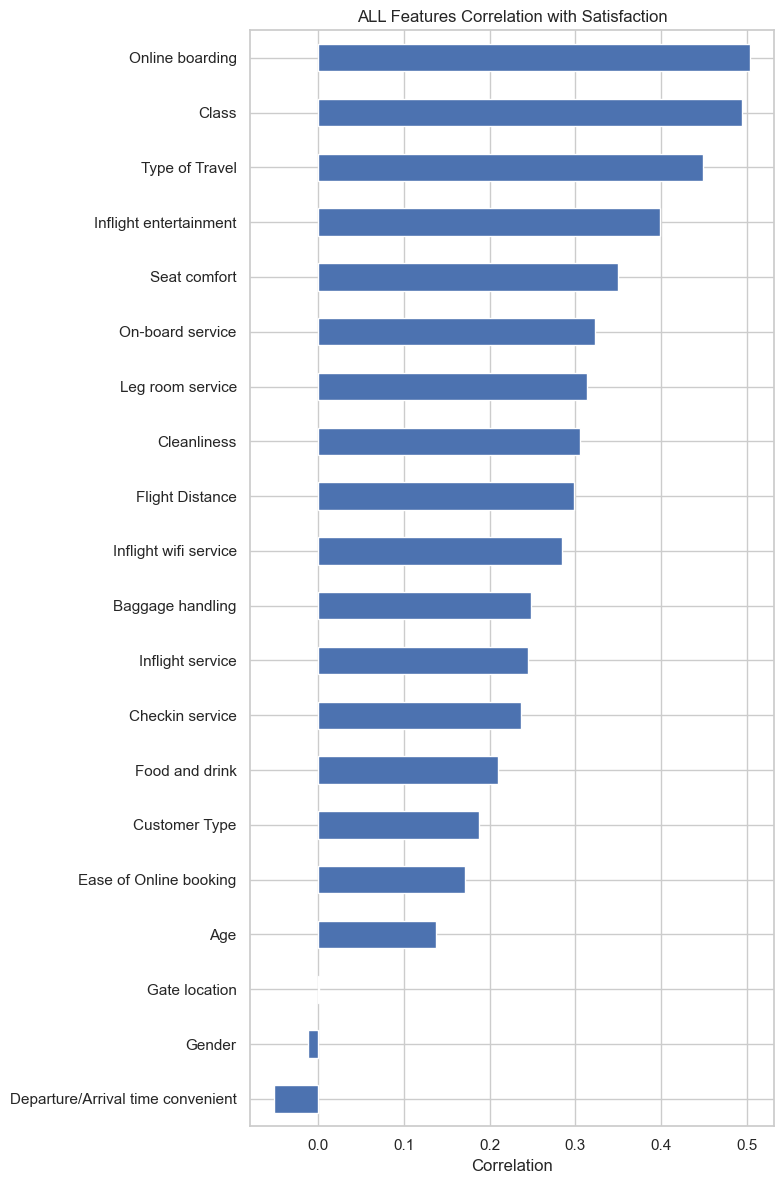

Departure/Arrival time convenient   -0.051601
Gender                              -0.012211
Gate location                        0.000682
Age                                  0.137167
Ease of Online booking               0.171705
Customer Type                        0.187638
Food and drink                       0.209936
Checkin service                      0.236174
Inflight service                     0.244741
Baggage handling                     0.247749
Inflight wifi service                0.284245
Flight Distance                      0.298780
Cleanliness                          0.305198
Leg room service                     0.313131
On-board service                     0.322383
Seat comfort                         0.349459
Inflight entertainment               0.398059
Type of Travel                       0.449000
Class                                0.494471
Online boarding                      0.503557
Name: satisfaction_num, dtype: float64

In [47]:
""" This sections shows all the feature correlations with Satisfaction """

all_features = service_cols + customer_cols

corr_all = (
    df2[all_features + ['satisfaction_num']]
    .corr()['satisfaction_num']
    .drop('satisfaction_num')
    .sort_values()
)

plt.figure(figsize=(8,12))
corr_all.plot(kind='barh')
plt.title("ALL Features Correlation with Satisfaction")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()

corr_all


In [48]:
""" This section calculates the mean scores for all features."""

all_features = service_cols + customer_cols

# Calculate mean of all features
all_means = df2[all_features].mean(numeric_only=True).to_frame(name='Mean')
all_means.index.name = "Feature"

all_means_sorted = all_means.sort_values(by='Mean', ascending=False)
all_means_sorted


,Mean
Feature,
Flight Distance,1189.448375
Age,39.379706
Inflight service,3.640428
Baggage handling,3.631833
Seat comfort,3.439396
On-board service,3.382363
Inflight entertainment,3.358158
Leg room service,3.351055
Checkin service,3.304290


### What affects Class satisfaction? (Top 3 Service Areas)

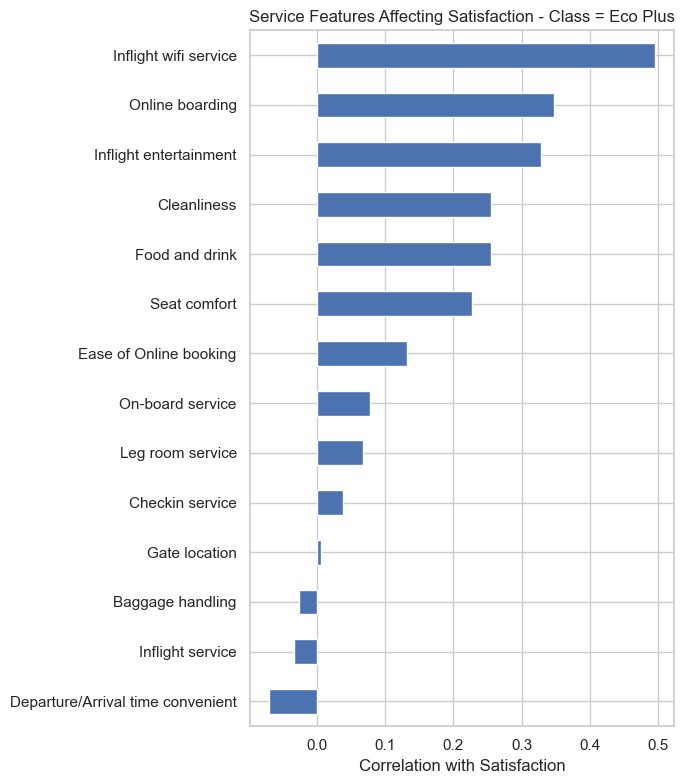


Top 3 Service Areas AFFECTING SATISFACTION (Class = Eco Plus):
Inflight wifi service     0.494850
Online boarding           0.347700
Inflight entertainment    0.328406
Name: satisfaction_num, dtype: float64
----------------------------------------------------


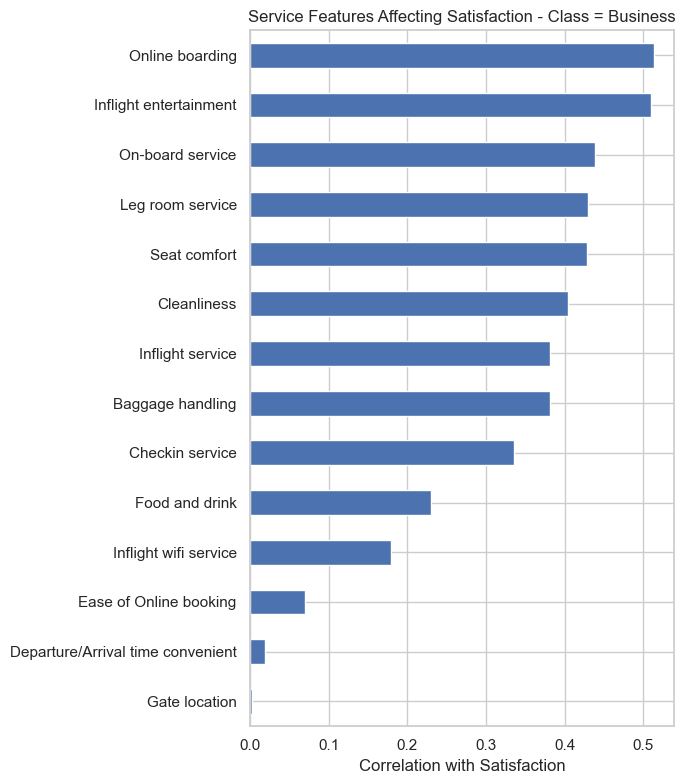


Top 3 Service Areas AFFECTING SATISFACTION (Class = Business):
Online boarding           0.513200
Inflight entertainment    0.509657
On-board service          0.438009
Name: satisfaction_num, dtype: float64
----------------------------------------------------


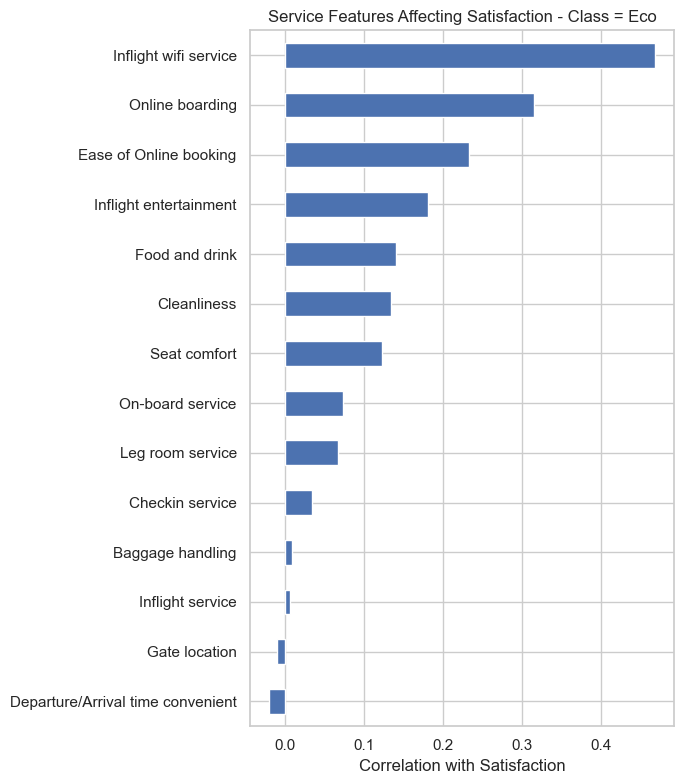


Top 3 Service Areas AFFECTING SATISFACTION (Class = Eco):
Inflight wifi service     0.467446
Online boarding           0.315534
Ease of Online booking    0.232656
Name: satisfaction_num, dtype: float64
----------------------------------------------------


In [49]:
"""
This section computes service–satisfaction correlations separately for each travel class. 
This highlights the top service factors driving satisfaction within each class.
"""

import seaborn as sns
import matplotlib.pyplot as plt

# Satisfaction numeric
df3 = df.copy()
df3['satisfaction_num'] = (df3['satisfaction'] == 'satisfied').astype(int)

# Service feature list
service_cols = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

classes = df3['Class'].unique()

# Correlation graph for each class
for c in classes:
    subset = df3[df3['Class'] == c]

    corr = (
        subset[service_cols + ['satisfaction_num']]
        .corr()['satisfaction_num']
        .drop('satisfaction_num')
        .sort_values(ascending=False)
    )

    # Plot
    plt.figure(figsize=(7,8))
    corr.plot(kind='barh')
    plt.title(f"Service Features Affecting Satisfaction - Class = {c}")
    plt.xlabel("Correlation with Satisfaction")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print(f"\nTop 3 Service Areas AFFECTING SATISFACTION (Class = {c}):")
    print(corr.head(3))
    
    print("----------------------------------------------------")


### Means of Class types

In [50]:
"""
This section calculates the mean scores of all service features separately for each travel class. 
It then sorts the features in descending order to show which service areas receive the highest ratings within each class.
"""

'\nThis section calculates the mean scores of all service features separately for each travel class. \nIt then sorts the features in descending order to show which service areas receive the highest ratings within each class.\n'

In [51]:
table1 = pd.DataFrame()

# Each class mean as a separate column
table1['Eco Plus'] = df[df['Class'] == 'Eco Plus'][service_cols].mean()

table1_sorted = table1.sort_values(by='Eco Plus', ascending=False)
table1_sorted

,Eco Plus
Inflight service,3.388444
Baggage handling,3.363758
Departure/Arrival time convenient,3.217507
Seat comfort,3.183747
Inflight entertainment,3.141713
Cleanliness,3.130771
Food and drink,3.122631
Leg room service,3.061382
On-board service,3.047638
Checkin service,3.017214


In [52]:
table2 = pd.DataFrame()
table2['Business'] = df[df['Class'] == 'Business'][service_cols].mean()

table2_sorted = table2.sort_values(by='Business', ascending=False)
table2_sorted

,Business
Inflight service,3.844579
Baggage handling,3.842907
Seat comfort,3.760858
Online boarding,3.716541
On-board service,3.679472
Leg room service,3.644498
Inflight entertainment,3.635437
Checkin service,3.519178
Cleanliness,3.477600
Food and drink,3.323165


In [53]:
table3 = pd.DataFrame()
table3['Eco'] = df[df['Class'] == 'Eco'][service_cols].mean()

table3_sorted = table3.sort_values(by='Eco', ascending=False)
table3_sorted

,Eco
Inflight service,3.463921
Baggage handling,3.450551
Departure/Arrival time convenient,3.199123
Seat comfort,3.138838
Checkin service,3.122002
On-board service,3.120355
Cleanliness,3.108097
Inflight entertainment,3.098256
Food and drink,3.086277
Leg room service,3.085720


### What affects Customer Type satisfaction? (Top 3 Service Areas)

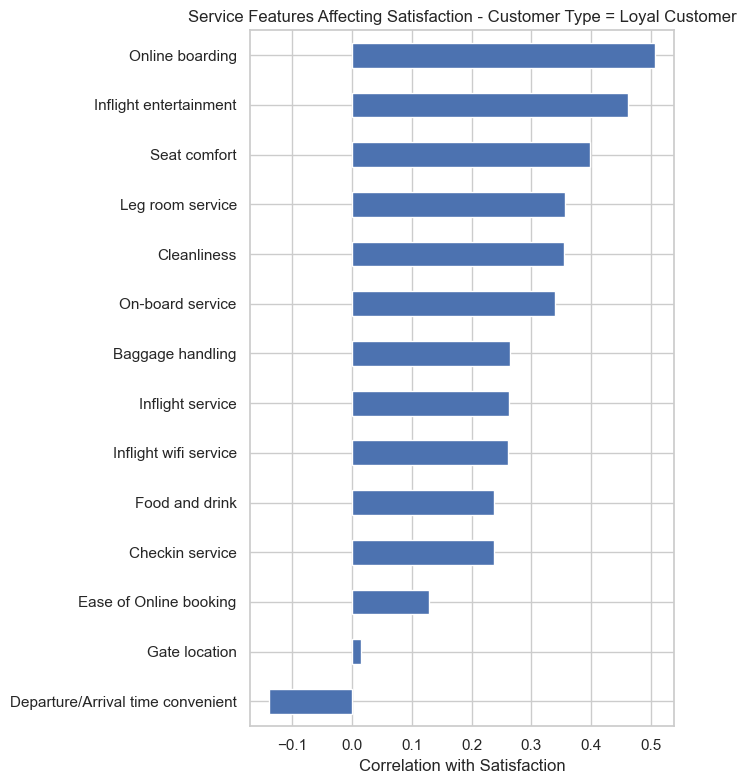


Top 3 Service Areas AFFECTING SATISFACTION (Customer Type = Loyal Customer):
Online boarding           0.506049
Inflight entertainment    0.461204
Seat comfort              0.398044
Name: satisfaction_num, dtype: float64
----------------------------------------------------


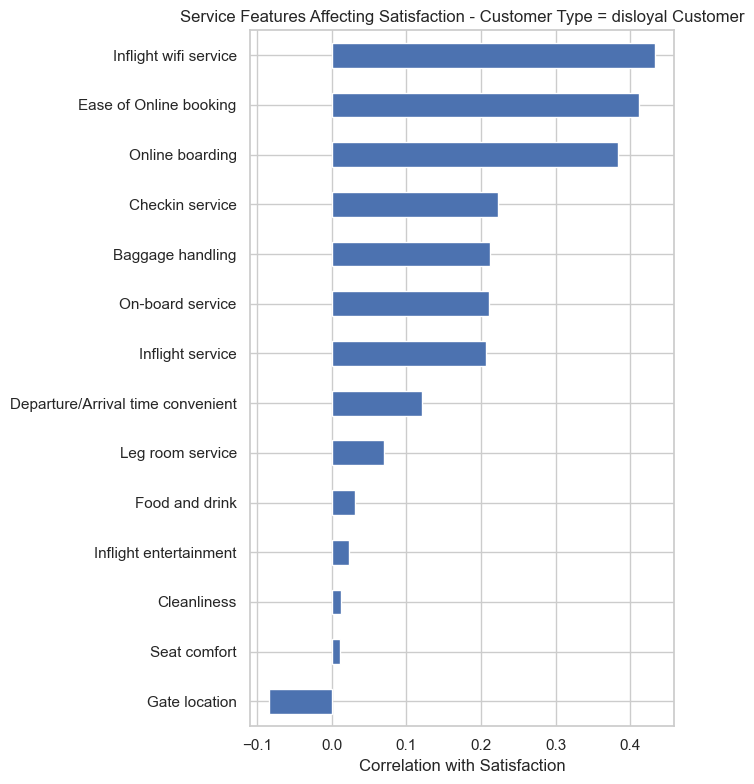


Top 3 Service Areas AFFECTING SATISFACTION (Customer Type = disloyal Customer):
Inflight wifi service     0.432576
Ease of Online booking    0.410936
Online boarding           0.382997
Name: satisfaction_num, dtype: float64
----------------------------------------------------


In [54]:
"""
This section calculates service–satisfaction correlations separately for each Customer Type.
For each segment, it filters the data, computes correlations between service features and satisfaction, 
and visualizes the results to highlight the top drivers of satisfaction within each customer group.
"""

import seaborn as sns
import matplotlib.pyplot as plt

df4 = df.copy()
df4['satisfaction_num'] = (df4['satisfaction'] == 'satisfied').astype(int)

service_cols = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

cust_types = df4['Customer Type'].unique()

# Correlation graph for each Customer Type
for t in cust_types:
    subset = df4[df4['Customer Type'] == t]

    corr = (
        subset[service_cols + ['satisfaction_num']]
        .corr()['satisfaction_num']
        .drop('satisfaction_num')
        .sort_values(ascending=False)
    )

    # Plot
    plt.figure(figsize=(7,8))
    corr.plot(kind='barh')
    plt.title(f"Service Features Affecting Satisfaction - Customer Type = {t}")
    plt.xlabel("Correlation with Satisfaction")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print(f"\nTop 3 Service Areas AFFECTING SATISFACTION (Customer Type = {t}):")
    print(corr.head(3))
    print("----------------------------------------------------")


### Means of Customer type

In [55]:
"""
This section calculates the mean scores of all service features separately for each customer class. 
It then sorts the features in descending order to show which service areas receive the highest ratings within each class.
"""

'\nThis section calculates the mean scores of all service features separately for each customer class. \nIt then sorts the features in descending order to show which service areas receive the highest ratings within each class.\n'

In [56]:
loyal_table = pd.DataFrame()
loyal_table = df[df['Customer Type'] == 'Loyal Customer'][service_cols].mean().to_frame(name='Loyal Mean')
loyal_table.index.name = "Service Area"

loyal_sorted = loyal_table.sort_values(by='Loyal Mean', ascending=False)
loyal_sorted

,Loyal Mean
Service Area,
Inflight service,3.627828
Baggage handling,3.618030
Seat comfort,3.538853
Inflight entertainment,3.427434
On-board service,3.416813
Leg room service,3.380827
Online boarding,3.371124
Cleanliness,3.338224
Checkin service,3.323540


In [57]:
disloyal_table = pd.DataFrame()
disloyal_table = df[df['Customer Type'] == 'disloyal Customer'][service_cols].mean().to_frame(name='Disloyal Mean')
disloyal_table.index.name = "Service Area"

disloyal_sorted = disloyal_table.sort_values(by='Disloyal Mean', ascending=False)
disloyal_sorted

,Disloyal Mean
Service Area,
Inflight service,3.696802
Baggage handling,3.693588
On-board service,3.228228
Checkin service,3.218166
Leg room service,3.217849
Cleanliness,3.054265
Inflight entertainment,3.048206
Food and drink,3.034930
Seat comfort,2.994415


# High Priority Service Features per Class Type

In [58]:
"""
This section identifies the service features most strongly correlated with satisfaction for each travel class. 
For every class segment, it filters features above the correlation threshold, 
calculates the class-specific mean score as a benchmark, and assigns a performance status (maintain or improve). 
The results are displayed in ranked summary tables.
"""

import pandas as pd

df3 = df.copy()
df3['satisfaction_num'] = (df3['satisfaction'] == 'satisfied').astype(int)

threshold = 0.3 
results_tables = {}

for c in df3['Class'].unique():
    subset = df3[df3['Class'] == c] 

    # subset mean for class
    subset_means = subset[service_cols].mean()

    # correlation 
    corr = subset[service_cols + ['satisfaction_num']].corr()['satisfaction_num'].drop('satisfaction_num')
    corr_filtered = corr[corr >= threshold]

    
    filtered_features = corr_filtered.index

    # Prepare table
    summary_df = pd.DataFrame({
        'Service Feature': filtered_features,
        'Mean (Class Subset)': subset_means[filtered_features].values, 
        'Correlation': corr_filtered.values
    })

    # Assessment column
    summary_df['Performance Status'] = summary_df['Mean (Class Subset)'].apply(
        lambda x: 'Maintain Service Performance' if x >= 3.5 else 'Needs Improvement'
    )

    summary_df = summary_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)
    results_tables[c] = summary_df


    display(f"Service Features with Correlation >= 0.3 for Class = {c}:")
    display(summary_df.round(3))
    display("" + "="*80)

'Service Features with Correlation >= 0.3 for Class = Eco Plus:'

,Service Feature,Mean (Class Subset),Correlation,Performance Status
0,Inflight wifi service,2.768,0.495,Needs Improvement
1,Online boarding,2.889,0.348,Needs Improvement
2,Inflight entertainment,3.142,0.328,Needs Improvement


'================================================================================'

'Service Features with Correlation >= 0.3 for Class = Business:'

,Service Feature,Mean (Class Subset),Correlation,Performance Status
0,Online boarding,3.717,0.513,Maintain Service Performance
1,Inflight entertainment,3.635,0.510,Maintain Service Performance
2,On-board service,3.679,0.438,Maintain Service Performance
3,Leg room service,3.644,0.430,Maintain Service Performance
4,Seat comfort,3.761,0.429,Maintain Service Performance
5,Cleanliness,3.478,0.404,Needs Improvement
6,Inflight service,3.845,0.381,Maintain Service Performance
7,Baggage handling,3.843,0.381,Maintain Service Performance
8,Checkin service,3.519,0.336,Maintain Service Performance


'================================================================================'

'Service Features with Correlation >= 0.3 for Class = Eco:'

,Service Feature,Mean (Class Subset),Correlation,Performance Status
0,Inflight wifi service,2.675,0.467,Needs Improvement
1,Online boarding,2.813,0.316,Needs Improvement


'================================================================================'

# High Priority Service Features per Customer Type

In [59]:
"""
This section analyzes service–satisfaction relationships separately for each Customer Type. 
For each segment, it selects service features above the correlation threshold, uses the 
segment mean as a benchmark, and assigns a performance status. 
The results are displayed in ranked summary tables.
"""

import pandas as pd

df4 = df.copy()
df4['satisfaction_num'] = (df4['satisfaction'] == 'satisfied').astype(int)

threshold = 0.3  
results_tables = {}

for c in df4['Customer Type'].unique():
    subset = df4[df4['Customer Type'] == c]

    # Customer Type mean
    subset_means = subset[service_cols].mean()

    # Correlation 
    corr_ct = subset[service_cols + ['satisfaction_num']].corr()['satisfaction_num'].drop('satisfaction_num')
    corr_ct_filtered = corr_ct[corr_ct >= threshold]

    filtered_features_ct = corr_ct_filtered.index

    # Prepare table
    summary_ct_df = pd.DataFrame({
        'Service Feature': filtered_features_ct,
        'Mean (Customer Type Subset)': subset_means[filtered_features_ct].values,
        'Correlation': corr_ct_filtered.values
    })

    # Assessment column
    summary_ct_df['Performance Status'] = summary_ct_df['Mean (Customer Type Subset)'].apply(
        lambda x: 'Maintain Service Performance' if x >= 3.5 else 'Needs Improvement'
    )

    summary_ct_df = summary_ct_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)
    results_tables[c] = summary_ct_df

    display(f"Service Features with Correlation >= 0.3 for Customer Type = {c}:")
    display(summary_ct_df.round(3))
    display("" + "="*80)


'Service Features with Correlation >= 0.3 for Customer Type = Loyal Customer:'

,Service Feature,Mean (Customer Type Subset),Correlation,Performance Status
0,Online boarding,3.371,0.506,Needs Improvement
1,Inflight entertainment,3.427,0.461,Needs Improvement
2,Seat comfort,3.539,0.398,Maintain Service Performance
3,Leg room service,3.381,0.357,Needs Improvement
4,Cleanliness,3.338,0.355,Needs Improvement
5,On-board service,3.417,0.339,Needs Improvement


'================================================================================'

'Service Features with Correlation >= 0.3 for Customer Type = disloyal Customer:'

,Service Feature,Mean (Customer Type Subset),Correlation,Performance Status
0,Inflight wifi service,2.708,0.433,Needs Improvement
1,Ease of Online booking,2.699,0.411,Needs Improvement
2,Online boarding,2.710,0.383,Needs Improvement


'================================================================================'